In [1]:
%matplotlib inline

In [2]:
import os
from collections import defaultdict
from matplotlib import pyplot as plt
import numpy as np

In [3]:
def read_ctm(ctm_file):
    probs = defaultdict(list)
    for line in open(os.path.join("data", ctm_file)):
        video, channel, start_time, duration, hypothesis, probability = line.split(" ")
        probs[video].append(1.0 - float(probability.strip()))
    return probs

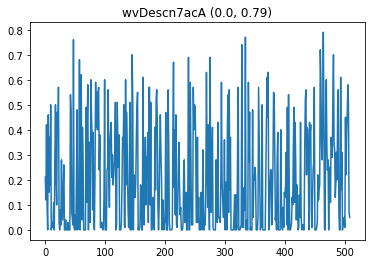

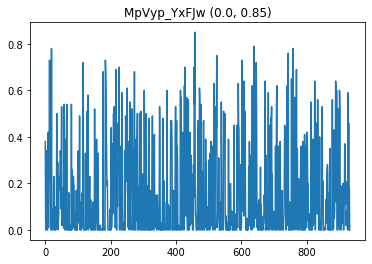

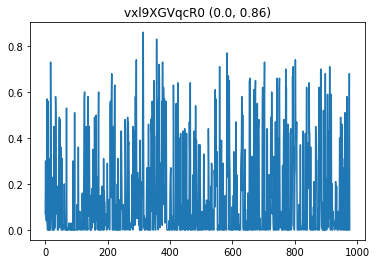

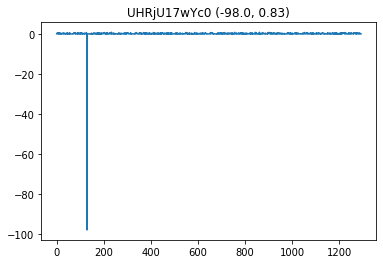

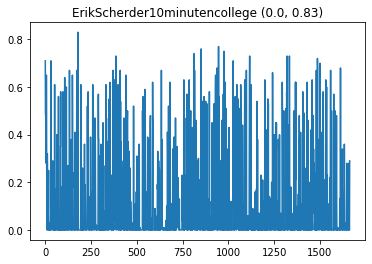

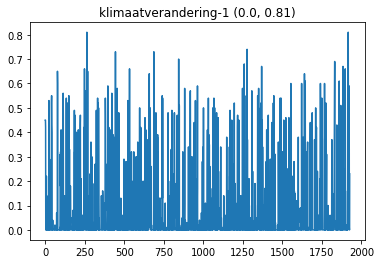

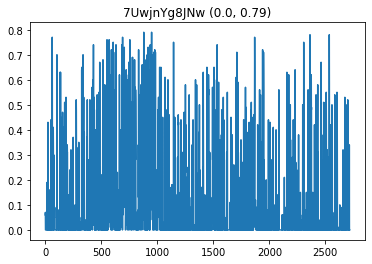

In [4]:
for entry in os.scandir("data"):
    ctm = read_ctm(entry.name)
    for video, probs in ctm.items():
        plt.plot(range(0, len(probs)), probs)
        plt.title(video + f" ({min(probs)}, {max(probs)})")
        plt.show()